In [2]:
import json
import keras
import tensorflow_probability as tfp
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from keras import callbacks
import pickle
import glob
import math

2022-05-18 12:40:05.086050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/egon/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-05-18 12:40:05.086105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
f = open('mpd.slice.0-999.json')
file = json.load(f)

JSONDecodeError: ignored

In [ ]:
playlists = []

for p in file['playlists']:
  playlist = []
  for track in p['tracks']:
    playlist.append(track['artist_name'] + " - " + track['track_name'])
  playlists.append(playlist)

In [ ]:
i = 0
track_dict = {}
for p in playlists:
  for t in p:
    if t not in track_dict.keys():
      track_dict[t] = i
      i += 1

dict_size = i

In [ ]:
playlists_tokenized = []

for p in playlists:
  playlist = []
  for t in p:
    playlist.append(track_dict[t])
  playlists_tokenized.append(playlist)

In [ ]:
n_steps = 1
n_features = 1

In [ ]:
data = []

for p in playlists_tokenized:
  for i in range(len(p) - n_steps):
    data.append([p[i], p[i+n_steps]])

df = pd.DataFrame(data, columns = ['Song', 'Next'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["Song"], df["Next"], test_size=0.20, random_state=42)

In [ ]:
y_test = tf.cast(y_test, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(keras.layers.Dense(1))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01), 
    loss=tf.keras.losses.MeanSquaredError(), 
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError(), keras.metrics.MeanSquaredError()],
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/4
1663/1663 [==============================] - 6s 3ms/step - loss: 86050432.0000 - root_mean_squared_error: 9276.3369 - mean_absolute_error: 6465.0942 - mean_squared_error: 86050432.0000 - val_loss: 83206688.0000 - val_root_mean_squared_error: 9121.7695 - val_mean_absolute_error: 6264.7065 - val_mean_squared_error: 83206688.0000
Epoch 2/4
1663/1663 [==============================] - 5s 3ms/step - loss: 84019272.0000 - root_mean_squared_error: 9166.2031 - mean_absolute_error: 6385.8843 - mean_squared_error: 84019272.0000 - val_loss: 82823400.0000 - val_root_mean_squared_error: 9100.7363 - val_mean_absolute_error: 6401.3374 - val_mean_squared_error: 82823400.0000
Epoch 3/4
1663/1663 [==============================] - 9s 5ms/step - loss: 83940072.0000 - root_mean_squared_error: 9161.8818 - mean_absolute_error: 6379.1958 - mean_squared_error: 83940072.0000 - val_loss: 82600544.0000 - val_root_mean_squared_error: 9088.4844 - val_mean_absolute_error: 6389.8809 - val_mean_squared_erro

In [ ]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_error', 'val_mean_squared_error'])

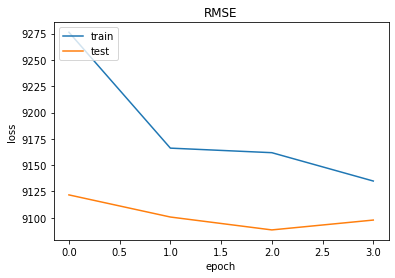

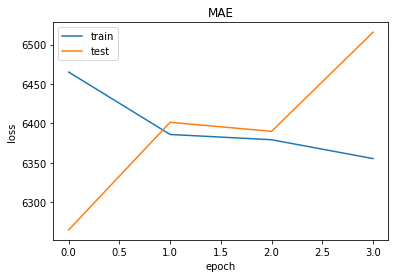

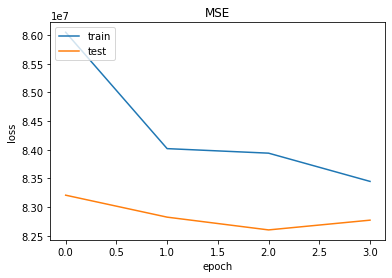

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('RMSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Popularity bias

In [3]:
playlists = []
total_number_of_songs = 0

for f in glob.glob('data/*.json'):
    print(f)
    file = json.load(open(f))
    for p in file['playlists']:
        playlist = []
        for track in p['tracks']:
            playlist.append(track['artist_name'] + " - " + track['track_name'])
            total_number_of_songs += 1
        playlists.append(playlist)

data/mpd.slice.56000-56999.json
data/mpd.slice.11000-11999.json
data/mpd.slice.69000-69999.json
data/mpd.slice.63000-63999.json
data/mpd.slice.97000-97999.json
data/mpd.slice.40000-40999.json
data/mpd.slice.73000-73999.json
data/mpd.slice.16000-16999.json
data/mpd.slice.2000-2999.json
data/mpd.slice.99000-99999.json
data/mpd.slice.13000-13999.json
data/mpd.slice.34000-34999.json
data/mpd.slice.43000-43999.json
data/mpd.slice.23000-23999.json
data/mpd.slice.87000-87999.json
data/mpd.slice.12000-12999.json
data/mpd.slice.59000-59999.json
data/mpd.slice.70000-70999.json
data/mpd.slice.26000-26999.json
data/mpd.slice.95000-95999.json
data/mpd.slice.92000-92999.json
data/mpd.slice.19000-19999.json
data/mpd.slice.46000-46999.json
data/mpd.slice.75000-75999.json
data/mpd.slice.30000-30999.json
data/mpd.slice.35000-35999.json
data/mpd.slice.1000-1999.json
data/mpd.slice.65000-65999.json
data/mpd.slice.72000-72999.json
data/mpd.slice.98000-98999.json
data/mpd.slice.62000-62999.json
data/mpd.sli

In [4]:
freq_dict = {}
for p in playlists:
  for t in p:
    if t in freq_dict.keys():
      freq_dict[t] +=1
    else:
      freq_dict[t] = 1

In [5]:
popularity_dict = {}
for t in freq_dict.keys():
  popularity_dict[t] = freq_dict[t] / total_number_of_songs

In [6]:
sorted_dict = sorted(popularity_dict.items(), key=lambda item: item[1], reverse=True)

In [7]:
i = 0
tokenized_sorted = {}
for t in sorted_dict:
  if t[0] not in tokenized_sorted.keys():
    tokenized_sorted[t[0]] = i
    i += 1

In [9]:
playlists_tokenized = []

for p in playlists:
  playlist = []
  for t in p:
    playlist.append(tokenized_sorted[t])
  #sort playlist
  playlists_tokenized.append(sorted(playlist))

In [10]:
n_steps = 1
n_features = 1

In [11]:
data = []

for p in playlists_tokenized:
  for i in range(len(p) - n_steps):
    data.append([p[i], p[i+n_steps]])

df = pd.DataFrame(data, columns = ['Song', 'Next'])

In [71]:
test = {}
for t in freq_dict:
    test[tokenized_sorted[t]] = freq_dict[t]

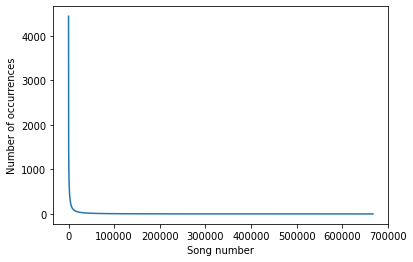

In [77]:
lists = sorted(test.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Number of occurrences')
plt.xlabel('Song number')
plt.show()

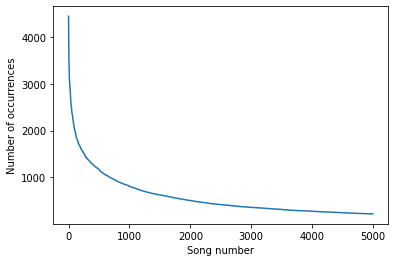

In [80]:
lists = sorted(test.items())[:5000]
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Number of occurrences')
plt.xlabel('Song number')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df["Song"], df["Next"], test_size=0.20, random_state=42)

In [13]:
y_test = tf.cast(y_test, tf.float32)
y_train = tf.cast(y_train, tf.float32)

2022-05-18 12:41:26.898648: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-18 12:41:26.898702: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (egon-OMEN-by-HP-Laptop): /proc/driver/nvidia/version does not exist
2022-05-18 12:41:26.900044: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
mean = df['Song'].mean()
std = df['Song'].std()

In [15]:
def make_model(input_fts):
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(2, input_dim=input_fts))
    return model

In [16]:
def gauss_loss(y_true, y_pred):
    """Negative log likelihood of y_true, with the likelihood defined by a normal distribution."""

    y_true = y_true[:, 0]
    means = y_pred[:, 0]
    # We predict the log of the standard deviation, so exponentiate the prediction here
    stds = tf.exp(y_pred[:, 1])
    variances = stds * stds

    log_p = (-tf.math.log(tf.sqrt(2 * math.pi * variances))
             -(y_true - means)*(y_true - means)/(2 * variances))

    return -log_p

In [62]:
def train_model(X, y, x_test, Y_test):
    """Builds the model, trains it on the given data, and returns the trained model and history."""
    
    # Normalize y to have zero mean and unit variance
    y = y - mean
    y = y / std
    
    num_features = 1
    model = make_model(num_features)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2,
                                         clipvalue=1,
                                         decay=1e-3)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics = [keras.metrics.RootMeanSquaredError(),
                            keras.metrics.MeanAbsoluteError(),
                            keras.metrics.MeanAbsolutePercentageError(),
                            keras.metrics.MeanSquaredLogarithmicError(),
                            keras.metrics.CosineSimilarity(),
                            keras.metrics.LogCoshError()])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

    history = model.fit(X, y,
                        epochs=100,
                        verbose=1,
                        batch_size=100,
                        validation_data=(x_test, Y_test),
                        callbacks=[callback])
    
    return model, history

In [18]:
def predict(model, X):
    
    predictions = model.predict(X)
    
    # Scale up means
    means = predictions[:, 0] * std + mean
    # Exponentiate and scale up log standard deviation
    stds = np.exp(predictions[:, 1]) * std
    
    return means, stds

In [63]:
reg_model, hist = train_model(X_train, y_train, X_test, y_test)

Epoch 1/100
52623/52623 [==============================] - 65s 1ms/step - loss: 838965.6250 - root_mean_squared_error: 915.9507 - mean_absolute_error: 11.3830 - mean_absolute_percentage_error: 7854.2388 - mean_squared_logarithmic_error: 0.4690 - cosine_similarity: 0.8257 - logcosh: 11.0797 - val_loss: 17622374400.0000 - val_root_mean_squared_error: 132749.3125 - val_mean_absolute_error: 56277.5117 - val_mean_absolute_percentage_error: 8390.8691 - val_mean_squared_logarithmic_error: 81.2345 - val_cosine_similarity: -1.0641 - val_logcosh: 56276.8203
Epoch 2/100
52623/52623 [==============================] - 62s 1ms/step - loss: 4.3090 - root_mean_squared_error: 2.0758 - mean_absolute_error: 0.7175 - mean_absolute_percentage_error: 581.8116 - mean_squared_logarithmic_error: 0.1335 - cosine_similarity: 1.0759 - logcosh: 0.4955 - val_loss: 17622441984.0000 - val_root_mean_squared_error: 132749.5469 - val_mean_absolute_error: 56277.5938 - val_mean_absolute_percentage_error: 7871.9917 - val_m

KeyboardInterrupt: 

In [46]:
pickle.dump(reg_model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://75d0cb42-124a-46f2-b3e2-562d6dc4da97/assets


Final train loss: 49.417449951171875


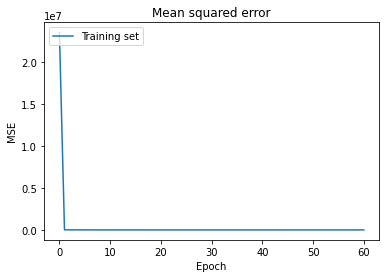

In [52]:
print("Final train loss:", hist.history["loss"][-1])
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Mean squared error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

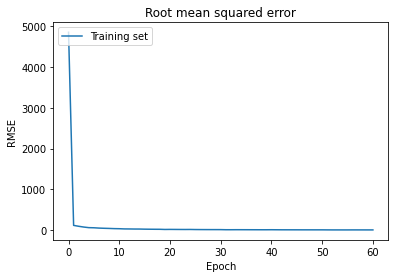

In [51]:
plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root mean squared error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

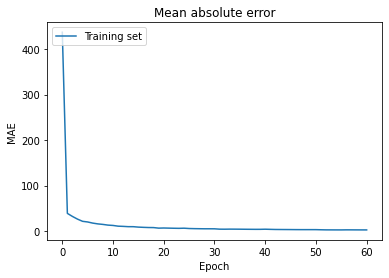

In [54]:
plt.plot(hist.history['mean_absolute_error'])
#plt.plot(hist.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

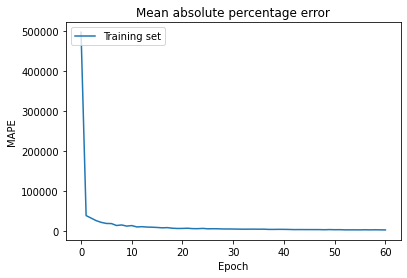

In [55]:
plt.plot(hist.history['mean_absolute_percentage_error'])
#plt.plot(hist.history['val_mean_absolute_percentage_error'])
plt.title('Mean absolute percentage error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

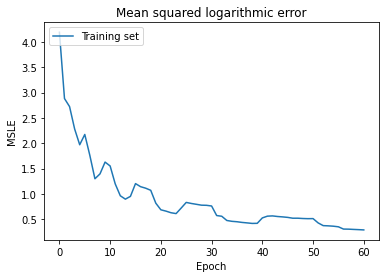

In [56]:
plt.plot(hist.history['mean_squared_logarithmic_error'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Mean squared logarithmic error')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

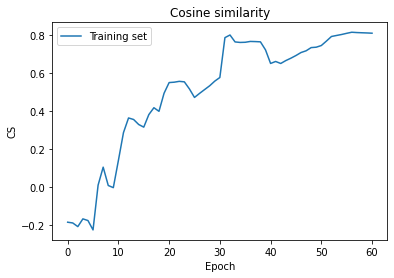

In [57]:
plt.plot(hist.history['cosine_similarity'])
#plt.plot(history.history['val_accuracy'])
plt.title('Cosine similarity')
plt.ylabel('CS')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

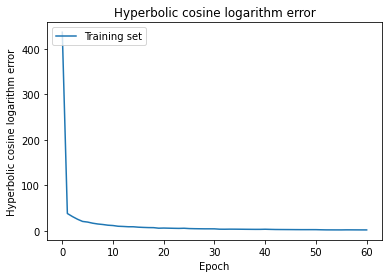

In [58]:
plt.plot(hist.history['logcosh'])
#plt.plot(history.history['val_accuracy'])
plt.title('Hyperbolic cosine logarithm error')
plt.ylabel('Hyperbolic cosine logarithm error')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [39]:
def visualize_prediction(prediction, actual, filename=None, bgcolor="#ffffff"):
    
    figure = plt.figure(figsize=(1000,1000))
    
    means, stds = prediction
    prediction_data = pd.DataFrame({"predicted": means,
                                    "actual": actual,
                                    "min": means - stds,
                                    "max": means + stds})
    
    plot = prediction_data[["predicted", "actual"]].plot()
    
    plot.set_facecolor(bgcolor)

    # plot.fill_between(prediction_data.index,
    #                   prediction_data["min"],
    #                   prediction_data["max"],
    #                   alpha=0.2, color='k')
    
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight", dpi=200)
    
    return figure, plot

(<Figure size 72000x72000 with 0 Axes>, <AxesSubplot:>)

<Figure size 72000x72000 with 0 Axes>

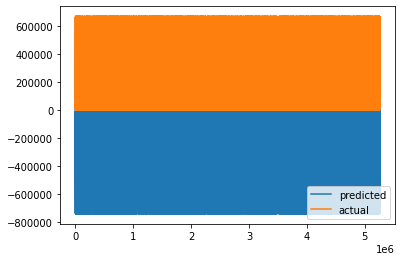

In [40]:
visualize_prediction(predict(reg_model, X_train), y_train, "song_prediction.svg")

In [34]:
def normpdf(x, mean, sd): #true_y, pred_y (mean), std
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [36]:
reg_y_test = np.array([n for n in list(range(total_number_of_songs - 1))])
means, stds = predict(reg_model, reg_y_test)
unc = []
for i in range(total_number_of_songs - 1):
    p = normpdf(df['Song'][i], means[i], stds[i]) 
    nll = -np.log(p)
    unc.append(nll)
plt.plot(unc)
plt.xlabel('Song number')
plt.ylabel('Uncertainty')
plt.show()

KeyError: 3294374

In [ ]:
def plot_uncertainty_pop(popuarity, uncertainty):
    id, counts = zip(*popuarity.items())
    plot_dict = {}
    i = 0
    for num in counts:
        #what if its already a number
        plot_dict[num] = uncertainty[i]
        i += 1
    pop, unc = zip(*plot_dict.items())
    print(scipy.stats.pearsonr(pop, unc))
    print(scipy.stats.spearmanr(pop, unc))
    print(scipy.stats.kendalltau(pop, unc))
    plt.scatter(pop, unc)
    plt.xlabel("Popuarity")
    plt.ylabel("Uncertainty")
    plt.show() #BREAK POINT HERE TO SEE THE PLOT

In [ ]:
plot_uncertainty_pop(popuarity, unc)